In [17]:
import pandas as pd
import numpy as np
from pbn import operations  as ops
from pbn import conversions as convert
from matplotlib import pyplot as plt
from matplotlib import image  as matimg
from scipy import ndimage
from pbn import suite as pbn_suite
%matplotlib inline

# Load Image

In [119]:
os.path.join('test', 't2', '3')

'test/t2/3'

In [121]:
n_colors=10
img_name = 'catamaran'
img_path = lambda filename: os.path.join('/Users/eczech/data/pbn/paintings', img_name, filename)

(935, 927, 3)


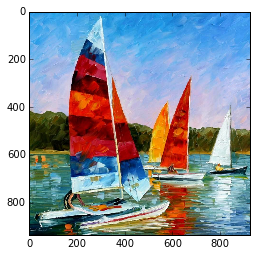

In [135]:
img_rgb = matimg.imread(img_path('source.png'))

#img_rgb = img_rgb[-600:, 0:400]
img_shape = img_rgb.shape
print(img_shape)

img_df = ops.unravel(convert.rgb_to_lab(img_rgb))
plt.imshow(img_rgb)

# Select Hyperparameters

In [ ]:
grid = {'alpha': [.008, .003], 'n_components': [800]}
grid_res = pbn_suite.run_cluster_grid(img_df, grid, par_n_jobs=1)

INFO:pbn.suite:Running pbn clustering for param grid {'n_components': [800], 'alpha': [0.008, 0.003]}
INFO:pbn.suite:Running pbn clustering for parameters {'n_components': 800, 'alpha': 0.008}


In [ ]:
pbn_suite.show_cluster_grid_results(grid_res, img_shape, n_cols=2)

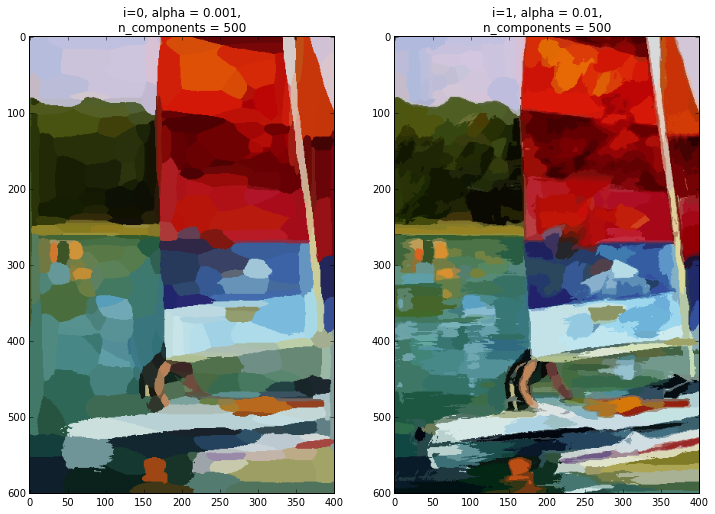

In [134]:
pbn_suite.show_cluster_grid_results(grid_res, img_shape, n_cols=2)

In [6]:
import imp
imp.reload(pbn_suite)

<module 'pbn.suite' from '/Users/eczech/repos/portfolio/functional/paint_by_numbers/python/pbn/suite.py'>

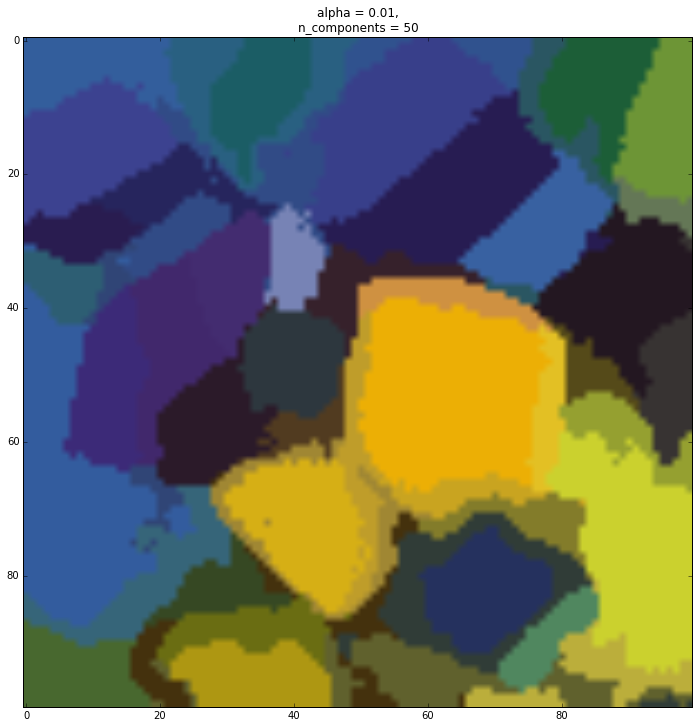

In [9]:
res = grid_res[2]
pbn_suite.show_cluster_grid_result(res, img_shape)

# Cluster Colors

In [13]:
cols = [c for c in res['img_df'].columns if c.endswith('_m')]
c_res = pbn_suite.get_color_clusters(res['img_df'], cols, res['alpha'], n_colors)

### Show Inferred Clusters

(100, 100, 3)


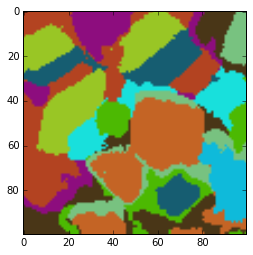

In [14]:
img_cluster_highlight = pbn_suite.get_cluster_highlights(c_res['img_df'], img_shape, 'cc')
plt.imshow(img_cluster_highlight)

# Determine Cluster Properties

In [16]:
c_props = pbn_suite.get_cluster_properties(c_res['img_df'], img_shape, threshold=.8, shrinkage=1, n_iterations=1)

6 clusters collapsed of 62


# Render Final Images

In [23]:
import imp
imp.reload(ops)
imp.reload(pbn_suite)

<module 'pbn.suite' from '/Users/eczech/repos/portfolio/functional/paint_by_numbers/python/pbn/suite.py'>

In [24]:
pbn = pbn_suite.render(c_props['properties'], img_rgb, res['alpha'], 
                       scale_factor=2, bkg=[1,1,1], edg=[.5,.5,.5], lbl=[.3,.3,.3])

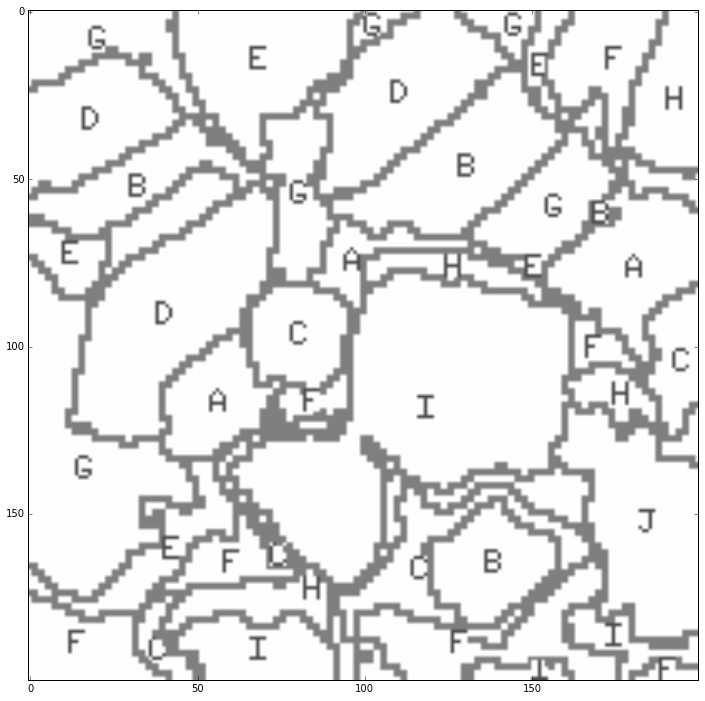

In [115]:
plt.figure(figsize=(24,12))
plt.imshow(pbn['pbn_unsolved'])

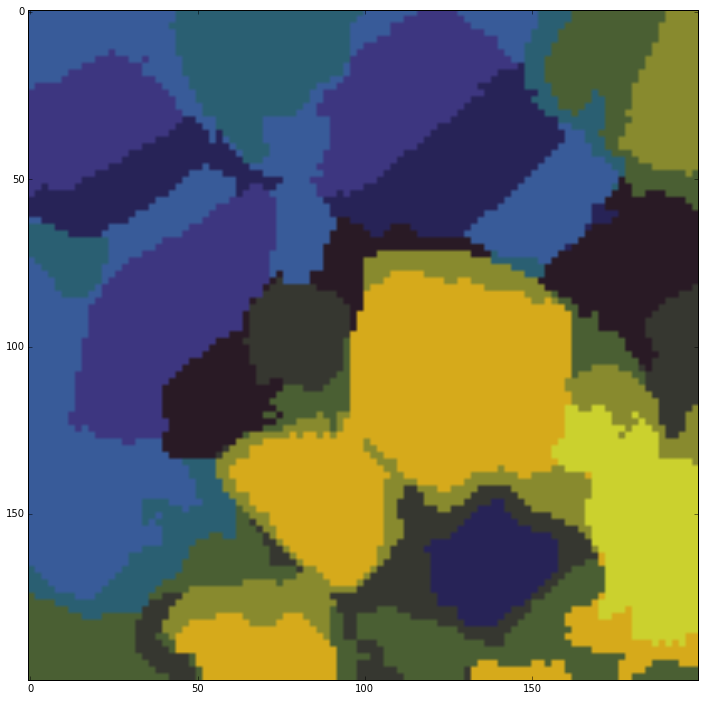

In [116]:
plt.figure(figsize=(24,12))
plt.imshow(pbn['pbn_solved'])

# Save Results

In [117]:
p1, p2, p3 = img_path('pbn.png'), img_path('key.png'), img_path('swatch.png')
matimg.imsave(p1, pbn['pbn_unsolved'])
matimg.imsave(p2, pbn['pbn_unsolved'])

'/Users/eczech/data/pbn/paintings/test_swatch.png'

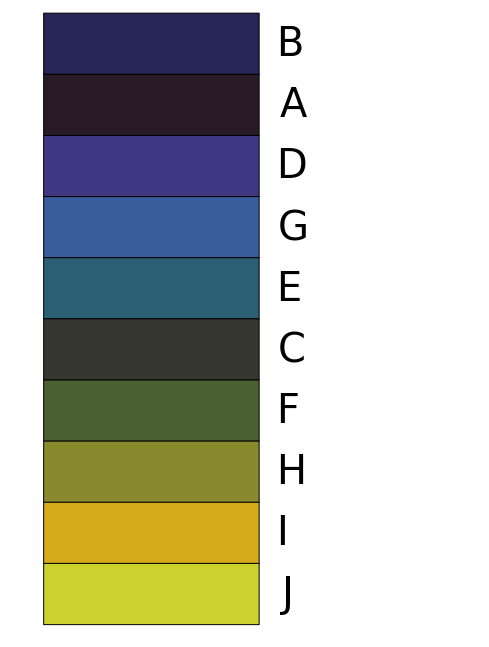

In [118]:
pbn_suite.export_color_swatch(p3, pbn['color_index'], res['alpha'],
                             swatch_height=500, swatch_width=500, colors_per_col=10, font_size=40)